In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Scikit-learn Guiding Principles

* Consistency - Sync within the apis
* Inspection - Parameters are taken by API. You should be able to configure those parameters
* Object Types - The APIs will absord only numpy & dataframes.
* Good Defaults - The default params should make good use of scikit-learn

#### Basics of API
1. Choosing the model
2. Choosing model hyperparameters - ( init values of model )
3. Arrange data into feature matrix (sizes of septels & petels) & target vector ( iris name ) 
4. Fit/Train the model using fit()
5. For supervised learning - Find labels using predict() method
6. For unsupervised learning - tranform() predict() to infer properties

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

[ 3.74540119  9.50714306  7.31993942  5.98658484  1.5601864   1.5599452
  0.58083612  8.66176146  6.01115012  7.08072578  0.20584494  9.69909852
  8.32442641  2.12339111  1.81824967  1.8340451   3.04242243  5.24756432
  4.31945019  2.9122914   6.11852895  1.39493861  2.92144649  3.66361843
  4.56069984  7.85175961  1.99673782  5.14234438  5.92414569  0.46450413
  6.07544852  1.70524124  0.65051593  9.48885537  9.65632033  8.08397348
  3.04613769  0.97672114  6.84233027  4.40152494  1.22038235  4.9517691
  0.34388521  9.09320402  2.58779982  6.62522284  3.11711076  5.20068021
  5.46710279  1.84854456]


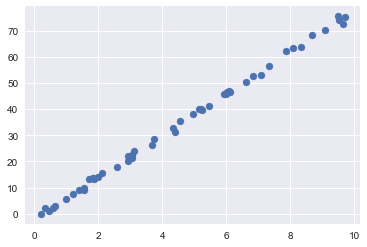

In [61]:
## Simulatibg x & y
## This is the training data
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
print(x)
y = 8 * x -2 + rng.randn(50)
plt.scatter(x, y);

In [6]:
# Develop an algorithm which for a value of x will predict value of y
y

array([  7.22926896,  18.18565441,  13.52423055,  10.67206599,
         0.64185082,   1.4000462 ,  -0.29896653,  17.38064514,
        11.36591852,  11.3984114 ,  -0.26422614,  18.01311476,
        14.97193082,   3.8584585 ,   3.66749887,   3.59937032,
         4.24562734,   9.18591626,   7.9701638 ,   5.80012793,
        10.75788366,   1.60421824,   3.736558  ,   5.13103024,
         8.93392551,  16.05975926,   2.92146552,  10.28822167,
        11.2099274 ,  -0.7161115 ,  11.51229264,   3.94851904,
         0.26520582,  19.5423544 ,  15.69289556,  15.98984947,
         5.17932245,   0.65443493,  12.77642131,   5.81548096,
         1.22109281,   9.26065077,   1.16566447,  16.66813782,
         3.36710603,  11.74868864,   6.14962364,   9.73011153,
         9.40444538,   3.21035654])

* Choose the model

In [53]:
from sklearn.linear_model import LinearRegression

* Choose the hyperparameters

In [8]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional
 |      whether to calculate the intercept for this model. If set
 |      to false, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      If True, the regressors X will be normalized before regression.
 |      This parameter is ignored when `fit_intercept` is set to False.
 |      When the regressors are normalized, note that this makes the
 |      hyperparameters learnt more robust and almost independent of the number
 |      of samples. The same property is not valid for standardized data.
 |      However, if you wish to standardize, please use
 |      `preprocessing.StandardScaler` before calling `fit` on an estimator
 |      with

In [62]:
model = LinearRegression(fit_intercept=True) # Adding a hyperparameter

In [63]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Independent Variable
Not dependent on other variables

#### Dependent Variables
Dependent on other variables - house price

##### Get Feature Matrix & target vector

In [64]:
X = x[:, np.newaxis]

X

array([[ 3.74540119],
       [ 9.50714306],
       [ 7.31993942],
       [ 5.98658484],
       [ 1.5601864 ],
       [ 1.5599452 ],
       [ 0.58083612],
       [ 8.66176146],
       [ 6.01115012],
       [ 7.08072578],
       [ 0.20584494],
       [ 9.69909852],
       [ 8.32442641],
       [ 2.12339111],
       [ 1.81824967],
       [ 1.8340451 ],
       [ 3.04242243],
       [ 5.24756432],
       [ 4.31945019],
       [ 2.9122914 ],
       [ 6.11852895],
       [ 1.39493861],
       [ 2.92144649],
       [ 3.66361843],
       [ 4.56069984],
       [ 7.85175961],
       [ 1.99673782],
       [ 5.14234438],
       [ 5.92414569],
       [ 0.46450413],
       [ 6.07544852],
       [ 1.70524124],
       [ 0.65051593],
       [ 9.48885537],
       [ 9.65632033],
       [ 8.08397348],
       [ 3.04613769],
       [ 0.97672114],
       [ 6.84233027],
       [ 4.40152494],
       [ 1.22038235],
       [ 4.9517691 ],
       [ 0.34388521],
       [ 9.09320402],
       [ 2.58779982],
       [ 6

In [38]:
X.shape

(50, 1)

In [65]:
model.fit(X,y) # model traning, model object is now a learned entity
# The model is trained
# This results into a function which in future if passed with feature matrix, will yield target vector

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
#Model is the realationship holder/finder between X & y
#Find line which best fit the dataset
print(model.coef_)
print(model.intercept_)

[ 7.9776566]
-1.90331072553


##### Predict outcome

In [48]:
newx = np.linspace(11,20,10)
newy = model.predict(newx[:, np.newaxis])
newx.shape

(10,)

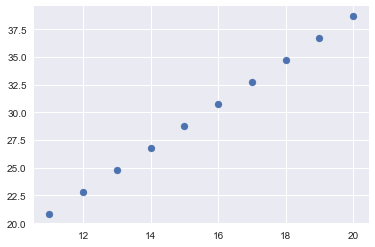

In [29]:
plt.scatter(newx,newy)

In [61]:
model.coef_

array([ 1.9776566])

In [62]:
model.intercept_

-0.90331072553111635

In [46]:
x[:, np.newaxis]

array([[ 3.74540119],
       [ 9.50714306],
       [ 7.31993942],
       [ 5.98658484],
       [ 1.5601864 ],
       [ 1.5599452 ],
       [ 0.58083612],
       [ 8.66176146],
       [ 6.01115012],
       [ 7.08072578],
       [ 0.20584494],
       [ 9.69909852],
       [ 8.32442641],
       [ 2.12339111],
       [ 1.81824967],
       [ 1.8340451 ],
       [ 3.04242243],
       [ 5.24756432],
       [ 4.31945019],
       [ 2.9122914 ],
       [ 6.11852895],
       [ 1.39493861],
       [ 2.92144649],
       [ 3.66361843],
       [ 4.56069984],
       [ 7.85175961],
       [ 1.99673782],
       [ 5.14234438],
       [ 5.92414569],
       [ 0.46450413],
       [ 6.07544852],
       [ 1.70524124],
       [ 0.65051593],
       [ 9.48885537],
       [ 9.65632033],
       [ 8.08397348],
       [ 3.04613769],
       [ 0.97672114],
       [ 6.84233027],
       [ 4.40152494],
       [ 1.22038235],
       [ 4.9517691 ],
       [ 0.34388521],
       [ 9.09320402],
       [ 2.58779982],
       [ 6

In [15]:
iris[['sepal_length','sepal_width']]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [70]:
x = np.random.randint(low=10, high=30, size=100)
x

array([18, 29, 19, 10, 20, 18, 27, 14, 16, 20, 23, 16, 12, 20, 26, 18, 10,
       23, 27, 16, 11, 16, 23, 20, 10, 23, 27, 21, 22, 12, 21, 23, 16, 23,
       26, 20, 26, 15, 11, 23, 29, 25, 10, 27, 20, 23, 13, 22, 23, 26, 10,
       21, 24, 25, 18, 18, 17, 25, 11, 21, 18, 27, 21, 25, 23, 22, 22, 25,
       11, 13, 18, 10, 28, 24, 14, 16, 17, 21, 28, 24, 26, 25, 13, 10, 25,
       13, 29, 17, 22, 19, 16, 19, 15, 28, 29, 15, 22, 18, 25, 12])

In [72]:
X = x.reshape(50,2)
y = X * 2 + 5
y

array([[41, 63],
       [43, 25],
       [45, 41],
       [59, 33],
       [37, 45],
       [51, 37],
       [29, 45],
       [57, 41],
       [25, 51],
       [59, 37],
       [27, 37],
       [51, 45],
       [25, 51],
       [59, 47],
       [49, 29],
       [47, 51],
       [37, 51],
       [57, 45],
       [57, 35],
       [27, 51],
       [63, 55],
       [25, 59],
       [45, 51],
       [31, 49],
       [51, 57],
       [25, 47],
       [53, 55],
       [41, 41],
       [39, 55],
       [27, 47],
       [41, 59],
       [47, 55],
       [51, 49],
       [49, 55],
       [27, 31],
       [41, 25],
       [61, 53],
       [33, 37],
       [39, 47],
       [61, 53],
       [57, 55],
       [31, 25],
       [55, 31],
       [63, 39],
       [49, 43],
       [37, 43],
       [35, 61],
       [63, 35],
       [49, 41],
       [55, 29]])

In [73]:
Y = y.sum(axis=1)

In [74]:
Y

array([104,  68,  86,  92,  82,  88,  74,  98,  76,  96,  64,  96,  76,
       106,  78,  98,  88, 102,  92,  78, 118,  84,  96,  80, 108,  72,
       108,  82,  94,  74, 100, 102, 100, 104,  58,  66, 114,  70,  86,
       114, 112,  56,  86, 102,  92,  80,  96,  98,  90,  84])

In [75]:
X

array([[18, 29],
       [19, 10],
       [20, 18],
       [27, 14],
       [16, 20],
       [23, 16],
       [12, 20],
       [26, 18],
       [10, 23],
       [27, 16],
       [11, 16],
       [23, 20],
       [10, 23],
       [27, 21],
       [22, 12],
       [21, 23],
       [16, 23],
       [26, 20],
       [26, 15],
       [11, 23],
       [29, 25],
       [10, 27],
       [20, 23],
       [13, 22],
       [23, 26],
       [10, 21],
       [24, 25],
       [18, 18],
       [17, 25],
       [11, 21],
       [18, 27],
       [21, 25],
       [23, 22],
       [22, 25],
       [11, 13],
       [18, 10],
       [28, 24],
       [14, 16],
       [17, 21],
       [28, 24],
       [26, 25],
       [13, 10],
       [25, 13],
       [29, 17],
       [22, 19],
       [16, 19],
       [15, 28],
       [29, 15],
       [22, 18],
       [25, 12]])

In [31]:
Y

array([ 54,  72, 106,  92,  80, 104,  96, 104,  86,  76,  98,  90,  96,
        52,  62,  82,  98,  64,  82,  90,  72,  86, 100,  56,  58, 100,
        72, 108,  88,  96, 106,  86,  54, 116,  56, 104,  64,  84,  90,
        88,  96, 100,  88,  86,  82,  96,  96,  80,  84,  92])

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
x

array([11, 11, 21, 10, 24, 24, 24, 17, 24, 11, 23, 24, 23, 20, 25, 22, 20,
       18, 23, 10, 27, 17, 20, 20, 27, 16, 11, 10, 12, 14, 26, 10, 29, 15,
       12, 15, 23, 13, 21, 19, 19, 12, 22, 16, 20, 25, 13, 10, 10, 14, 16,
       29, 13, 18, 27, 22, 17, 22, 18, 25, 27, 21, 13, 25, 10, 12, 29, 24,
       10, 13, 18, 29, 14, 13, 16, 21, 15, 25, 17, 22, 19, 24, 21, 24, 22,
       17, 25, 13, 17, 19, 22, 21, 18, 25, 19, 16, 13, 24, 18, 23])

In [35]:
model = LinearRegression(fit_intercept=True)

In [36]:
x

array([11, 11, 21, 10, 24, 24, 24, 17, 24, 11, 23, 24, 23, 20, 25, 22, 20,
       18, 23, 10, 27, 17, 20, 20, 27, 16, 11, 10, 12, 14, 26, 10, 29, 15,
       12, 15, 23, 13, 21, 19, 19, 12, 22, 16, 20, 25, 13, 10, 10, 14, 16,
       29, 13, 18, 27, 22, 17, 22, 18, 25, 27, 21, 13, 25, 10, 12, 29, 24,
       10, 13, 18, 29, 14, 13, 16, 21, 15, 25, 17, 22, 19, 24, 21, 24, 22,
       17, 25, 13, 17, 19, 22, 21, 18, 25, 19, 16, 13, 24, 18, 23])

In [38]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
model.coef_

array([ 2.,  2.])

In [40]:
model.intercept_

9.9999999999999858

In [43]:
model.predict([[33,44],[55,2]])

array([ 164.,  124.])

In [76]:

model.score()

HTTPError: HTTP Error 404: Not Found

In [77]:
import pandas as pd

In [86]:
df = pd.DataFrame({'name':['a','b','c'],'age':[44,33,11]})
y = np.array([5,66,77])

In [80]:
from sklearn.model_selection import train_test_split

In [89]:
a,b,c,d = train_test_split(df,y, test_size=0.33)

In [90]:
a

,age,name
0,44,a
2,11,c


In [91]:
b

,age,name
1,33,b


In [92]:
c

array([ 5, 77])

In [93]:
d

array([66])

In [94]:
from sklearn.datasets import load_boston

In [109]:
boston_data = load_boston()

In [97]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [101]:
boston.data.shape

(506, 13)

In [107]:
boston = pd.DataFrame(boston.data,columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [104]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [108]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [113]:
price = boston_data.target

In [114]:
price.shape

(506,)

In [115]:
price[0]

24.0

In [118]:
train_data, test_data , train_result, test_result = train_test_split(boston,price,test_size=0.3)
#train_data & test_data only includes feature info not price info
#price_info info is present in train_result & test_result

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
model = LinearRegression(fit_intercept=True)

In [121]:
model.fit(train_data,train_result)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
y_predict = model.predict(test_data)

In [123]:
help(model.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model.base.LinearRegression instance
    Returns the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the regression
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the residual
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True values for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float

In [124]:
model.score(test_result,y_predict)

C:\Users\ZekeLabs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: shapes (1,152) and (13,) not aligned: 152 (dim 1) != 13 (dim 0)

In [127]:
test_result.shape

(152,)

In [128]:
from sklearn.metrics import accuracy_score

In [129]:
accuracy_score(test_result,y_predict)

ValueError: continuous is not supported